In [2]:
import spacy
import matplotlib.pyplot as plt

In [3]:
nlp = spacy.load("en_core_web_md")

/Users/lukas/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from docx import Document

In [5]:
document = Document('./../Linss-Lukas-ba.docx')

In [6]:
paragraphs = document.paragraphs
text = ''

for i, p in enumerate(paragraphs):
    if len(p.text) > 100:
        text += p.text

In [7]:
doc = nlp(text)

In [8]:
for ent in doc.ents: 
    print(ent.text, ent.label_)

Brands ORG
almost 50 years DATE
eight CARDINAL
145 CARDINAL
the first three weeks DATE
one CARDINAL
Facebook ORG
Meta ORG
the past years DATE
Google ORG
early days DATE
the past decade DATE
two CARDINAL
Firstly ORDINAL
today DATE
Worldline ORG
first ORDINAL
the year 1992 DATE
Neal Stephenson PERSON
Snow Crash WORK_OF_ART
three CARDINAL
the 1970s DATE
first ORDINAL
Second Life ORG
2003 DATE
these early days DATE
Roblox ORG
150 million CARDINAL
monthly DATE
MAU ORG
Today DATE
virtual & ORG
Nike ORG
Gucci PRODUCT
today DATE
1 CARDINAL
five CARDINAL
AR GPE
VR ORG
MUD PRODUCT
the 1970s DATE
five CARDINAL
the 1970s DATE
the present day DATE
five CARDINAL
first ORDINAL
Second Life ORG
2003 DATE
Linden Lab ORG
USD 500 million MONEY
the year 2015 DATE
fifth ORDINAL
Dionisio et al PERSON
MetaWorlds ORG
MetaGalaxies PRODUCT
MetaWorlds ORG
Galaxies ORG
VR ORG
AR GPE
Dwivedi et al PERSON
VR ORG
VR ORG
today DATE
Components WORK_OF_ART
Lee et al PERSON
14 CARDINAL
1 CARDINAL
Duan et al PERSON
OSI OR

In [9]:
named_ents_dic = {}
for ent in doc.ents:
    if ent.label_ in named_ents_dic:
        named_ents_dic[ent.label_] += 1
    else:
        named_ents_dic[ent.label_] = 1

In [10]:
sorted_ents_dic = {k: v for k, v in sorted(named_ents_dic.items(), key=lambda item: item[1], reverse=True)}
print(sorted_ents_dic)

{'ORG': 231, 'CARDINAL': 158, 'DATE': 73, 'PERSON': 50, 'LOC': 28, 'ORDINAL': 20, 'PERCENT': 18, 'GPE': 14, 'PRODUCT': 11, 'NORP': 11, 'MONEY': 10, 'WORK_OF_ART': 4, 'TIME': 4, 'QUANTITY': 3, 'LAW': 3, 'FAC': 2}


In [ ]:
from spacy import displacy
displacy.render(doc, style='ent')

In [38]:
import pandas as pd

data = {'Named Entities': list(sorted_ents_dic.keys()),
        'Found in Document' : list(sorted_ents_dic.values())
        }

df = pd.DataFrame(data=data)

In [32]:
print(df.head())

  Named Entities  Found in Document
0            ORG                231
1       CARDINAL                158
2           DATE                 73
3         PERSON                 50
4            LOC                 28


In [39]:
total_entities = df['Found in Document'].sum()
percentage = [x / total_entities for x in df['Found in Document'].tolist()]
df['Percentage'] = percentage

In [40]:
data = [ent + ': ' + spacy.explain(ent) for ent in df['Named Entities'].tolist()]
df.insert(1, 'Definition', data)

In [35]:
df.to_excel('Named_Entities.xlsx')

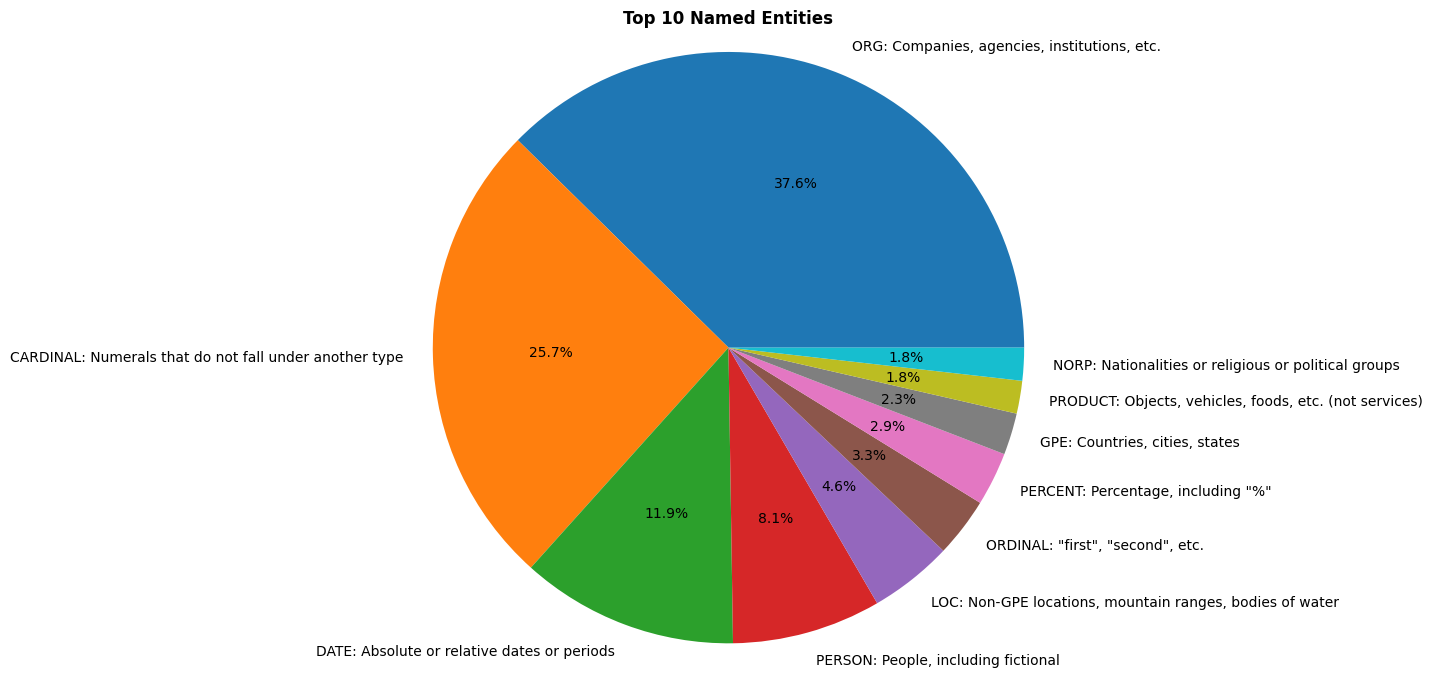

In [54]:
labels = df['Named Entities'].tolist()[0:10]
definitions = df['Definition'].tolist()[0:10]
percentage = df['Percentage'].tolist()[0:10]

fig, ax = plt.subplots()
plt.title("Top 10 Named Entities", fontweight='bold' ,pad=100)
ax.pie(percentage, labels=definitions, autopct='%1.1f%%', radius=2)
plt.show()